# Logistic map

Mathematically, the [logistic map](https://en.wikipedia.org/wiki/Logistic_map) is written

$$x_{n+1}=\mu x_n(1-x_n)$$

where $x_n$ is a number between zero and one that represents the ratio of existing population to the maximum possible population. The values of interest for the parameter $\mu$ are those in the interval $[0,4]$, so that $x_n$ remains bounded on $[0,1]$.

We will draw the system's bifurcation diagram, which shows the possible long-term behaviors (equilibria, fixed points, periodic orbits, and chaotic trajectories) as a function of the system's parameter. We will also compute an approximation of the system's Lyapunov exponent, characterizing the model's sensitivity to initial conditions.

Let's import NumPy and matplotlib:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here is the implementation of this function in Python:

In [2]:
def logistic(mu, x):
    return mu * x * (1 - x)

Here is a graphic representation of this function

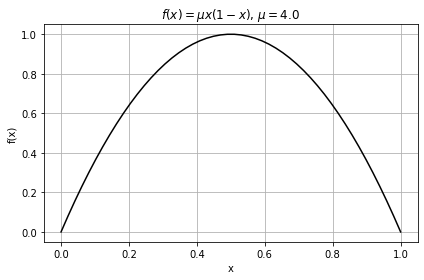

In [3]:
x = np.linspace(0, 1)
mu = 4
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(mu, x), 'k')
plt.title(f'$f(x)=\mu x (1-x)$, $\mu={mu:.1f}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.tight_layout()
plt.show()

Our discrete dynamical system is defined by the recursive application of the logistic function:

$$x_{n+1}^{(\mu)}=f_\mu(x_n^{(\mu)})=\mu x_n^{(\mu)}(1-x_n^{(\mu)})$$

Let's simulate a few iterations of this system with two different values of $\mu$:

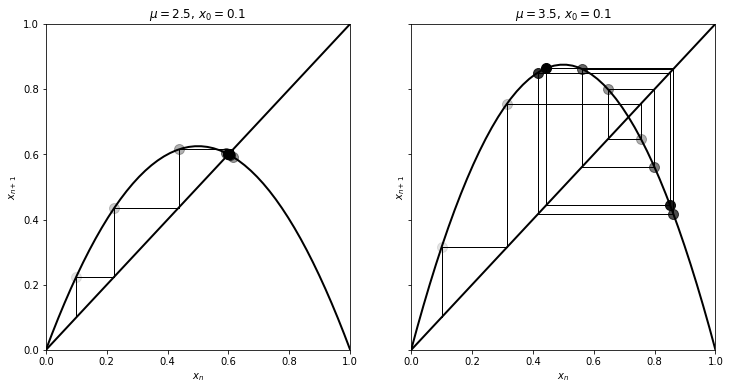

In [4]:
def plot_system(mu, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(mu, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(mu, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlabel('$x_n$')
    ax.set_ylabel('$x_{n+1}$')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$\mu={mu:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)

On the left panel, we can see that our system converges to the intersection point of the curve and the diagonal line (fixed point). On the right panel however, using a different value for $\mu$, we observe a seemingly chaotic behavior of the system.

Now, we simulate this system for 10000 values of $\mu$ linearly spaced between 2.5 and 4, and vectorize the simulation with NumPy by considering a vector of independent systems (one dynamical system per parameter value):

In [5]:
n = 10000
mu = np.linspace(2.5, 4.0, n)

We use 1000 iterations of the logistic map and keep the last 100 iterations to display the bifurcation diagram:

In [6]:
iterations = 1000
last = 100

We initialize our system with the same initial condition $x_0=0.00001$:

In [7]:
x = 1e-5 * np.ones(n)

We also compute an approximation of the Lyapunov exponent for every value of $\mu$. The Lyapunov exponent is defined by:

$$\lambda(\mu)=lim_{n\to\infty}\frac{1}{n}\sum_{i=0}^{n-1}\log \left|\frac{df_\mu}{dx}(x_i^{(\mu)})\right|$$

We first initialize the lyapunov vector:

In [8]:
lyapunov = np.zeros(n)

Now, we simulate the system and plot the bifurcation diagram. The simulation only involves the iterative evaluation of the `logistic()` function on our vector $x$. Then, to display the bifurcation diagram, we draw one pixel per point $x_n^{(\mu)}$ during the last 100 iterations:

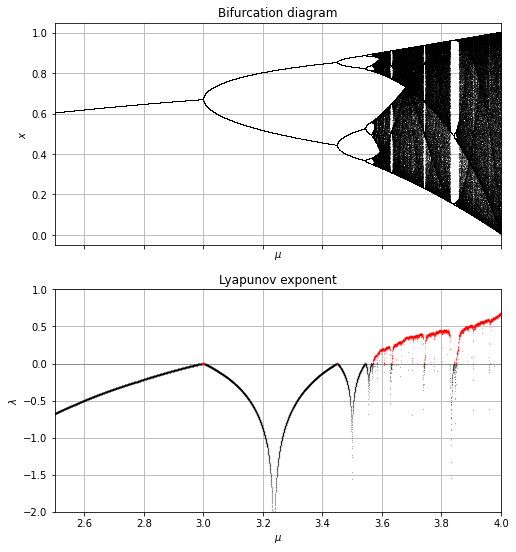

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(mu, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(mu - 2 * mu * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(mu, x, ',k', alpha=.25)
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('$x$')
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")
ax1.grid(True)

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(mu[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(mu[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlabel('$\mu$')
ax2.set_ylabel('$\lambda$')
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
ax2.grid(True)

The bifurcation diagram brings out the existence of a fixed point for $\mu<3$, then two and four equilibria, and a chaotic behavior when $\mu$ belongs to certain areas of the parameter space.

We observe an important property of the Lyapunov exponent: it is positive when the system is chaotic (in red here).